In [2]:
import tensorflow as tf
import keras
from keras import layers
import cv2
import os
import matplotlib.pyplot as plt 
import numpy as np
import pickle

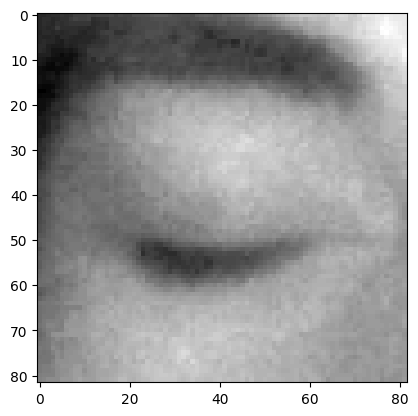

In [3]:
Datadirectory = "C:/Users/Vivobook/Desktop/CS2/DS/Lect/new_data"
Classes = ["close eyes","open eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
img_array.shape

(82, 82)

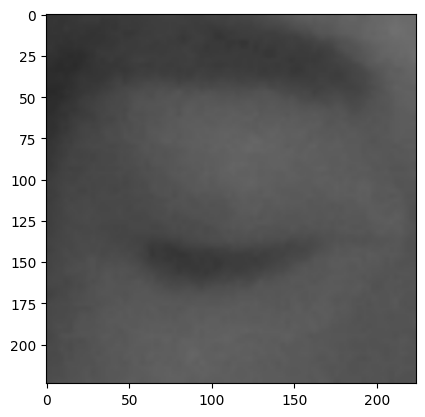

In [6]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

### Reading all images and converting them into an array for data and labels

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

8000


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
print(X)

[[[[ 84  84  84]
   [ 84  84  84]
   [ 84  84  84]
   ...
   [199 199 199]
   [199 199 199]
   [199 199 199]]

  [[ 84  84  84]
   [ 84  84  84]
   [ 84  84  84]
   ...
   [199 199 199]
   [199 199 199]
   [199 199 199]]

  [[ 84  84  84]
   [ 84  84  84]
   [ 83  83  83]
   ...
   [199 199 199]
   [199 199 199]
   [199 199 199]]

  ...

  [[137 137 137]
   [137 137 137]
   [137 137 137]
   ...
   [146 146 146]
   [145 145 145]
   [145 145 145]]

  [[137 137 137]
   [137 137 137]
   [137 137 137]
   ...
   [146 146 146]
   [145 145 145]
   [145 145 145]]

  [[137 137 137]
   [137 137 137]
   [137 137 137]
   ...
   [146 146 146]
   [145 145 145]
   [145 145 145]]]


 [[[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [159 159 159]
   [165 165 165]
   [165 165 165]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [159 159 159]
   [165 165 165]
   [165 165 165]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [159 159 159]
   [164 164 164]
   [164 164

In [13]:
print(y)

[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [14]:
X.shape

(8000, 224, 224, 3)

In [15]:
#normalize the data
X = X/255.0

In [16]:
print(X)

[[[[0.32941176 0.32941176 0.32941176]
   [0.32941176 0.32941176 0.32941176]
   [0.32941176 0.32941176 0.32941176]
   ...
   [0.78039216 0.78039216 0.78039216]
   [0.78039216 0.78039216 0.78039216]
   [0.78039216 0.78039216 0.78039216]]

  [[0.32941176 0.32941176 0.32941176]
   [0.32941176 0.32941176 0.32941176]
   [0.32941176 0.32941176 0.32941176]
   ...
   [0.78039216 0.78039216 0.78039216]
   [0.78039216 0.78039216 0.78039216]
   [0.78039216 0.78039216 0.78039216]]

  [[0.32941176 0.32941176 0.32941176]
   [0.32941176 0.32941176 0.32941176]
   [0.3254902  0.3254902  0.3254902 ]
   ...
   [0.78039216 0.78039216 0.78039216]
   [0.78039216 0.78039216 0.78039216]
   [0.78039216 0.78039216 0.78039216]]

  ...

  [[0.5372549  0.5372549  0.5372549 ]
   [0.5372549  0.5372549  0.5372549 ]
   [0.5372549  0.5372549  0.5372549 ]
   ...
   [0.57254902 0.57254902 0.57254902]
   [0.56862745 0.56862745 0.56862745]
   [0.56862745 0.56862745 0.56862745]]

  [[0.5372549  0.5372549  0.5372549 ]
   [0.5

In [17]:
Y = np.array(y)

In [18]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

### deep learning model for training


In [21]:
model = tf.keras.applications.mobilenet.MobileNet()

In [22]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

### Transfer Learning

In [23]:
base_input = model.layers[0].input

In [24]:
base_output = model.layers[-4].output

In [56]:
from matplotlib.cbook import flatten

Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
Final_output = layers.Activation('sigmoid')(final_output)

In [57]:
new_model = keras.Model(inputs = base_input,  outputs = final_output)

In [58]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

### Setting for binary classification (open / close)

In [59]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [60]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

225/225 [==============================] - 158s 669ms/step - loss: 0.8235 - accuracy: 0.9429 - val_loss: 2.1641 - val_accuracy: 0.8475


In [61]:
new_model.save('my_model.keras')

In [62]:
from keras.models import load_model

new_model = load_model("C:/Users/Vivobook/Desktop/Programming/Python/DS/Lab/my_model.keras")

### checking the network prediction

In [63]:
img_array = cv2.imread("C:/Users/Vivobook/Desktop/CS2/DS/Lect/dataset/data/train/close eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [64]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [65]:
X_input.shape

(1, 224, 224, 3)

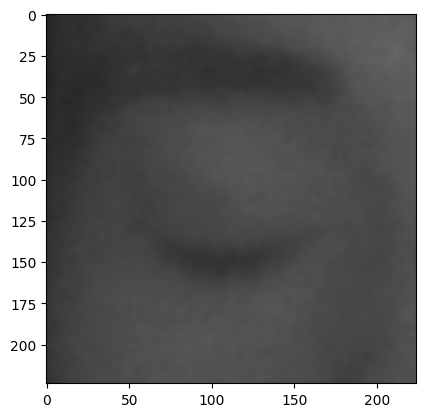

In [66]:
plt.imshow(new_array)

In [67]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 307ms/step


In [68]:
prediction

array([[-5.322514]], dtype=float32)

### check unknown image

In [69]:
img = cv2.imread("C:/Users/Vivobook/Downloads/test_img.jpeg")

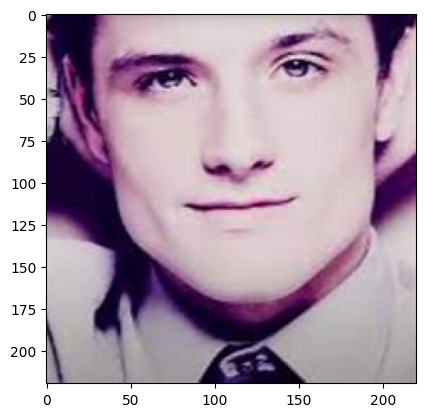

In [70]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [71]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [72]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [73]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [74]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [75]:
for(x, y , w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

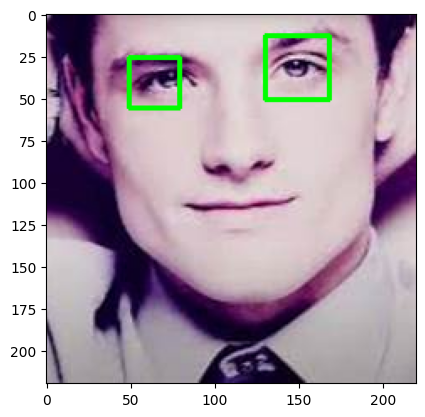

In [76]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### cropping the eye img

In [77]:
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for(ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

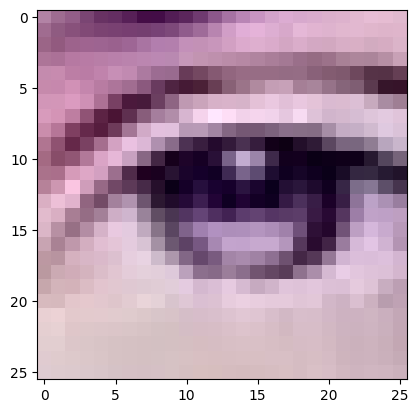

In [78]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [79]:
eyes_roi.shape

(26, 26, 3)

In [80]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis = 0)
final_img = final_img / 255.0

In [81]:
final_img.shape

(1, 224, 224, 3)

In [82]:
new_model.predict(final_img)

1/1 [==============================] - 0s 277ms/step


array([[35.24234]], dtype=float32)

### realtime vid

In [ ]:
from numpy import eye


path = "C:/Users/Vivobook/Downloads/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can not open webcam")

while True:
    ret, frame = cap.read()
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eyeCascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

    final_img = cv2.resize(eyes_roi, (224,224))
    final_img = np.expand_dims(final_img, axis = 0)
    final_img = final_img/255.0

    Predictions = new_model.predict(final_img)
    if Predictions > 0:
        status = "open eyes"
    else:
        status = "close eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,
                status,
                (50,50),
                font, 3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.imshow("Drowsiness Detection", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()